<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(3_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_3.6_n20.csv',
 'data_add_delta_3.6_n30.csv',
 'data_add_delta_3.6_n60.csv',
 'data_add_delta_3.6_n120.csv',
 'data_add_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.214523,74.323571,69.460267,96.516671,2915.605899,3249.120931,618.233868,2630.887063
1,0.0,1.0,26.621668,40.206809,55.976722,35.796158,-831.405762,-662.804405,-692.084250,29.279845
2,0.0,2.0,34.339825,62.923957,84.717812,44.349640,-1594.382797,-1358.051563,-510.126846,-847.924717
3,0.0,3.0,44.446091,41.015503,27.192041,23.009599,-753.078660,-607.415427,-679.157677,71.742251
4,0.0,4.0,23.525563,29.309520,69.044040,75.029601,-321.085992,-114.177268,-228.491821,114.314553
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,94.330046,91.921060,40.547337,81.958991,294.342305,613.099739,-332.145297,945.245036
59996,999.0,56.0,58.281962,51.323418,63.392267,81.296814,-1118.436257,-854.141797,33.485610,-887.627407
59997,999.0,57.0,84.703580,29.534769,45.542064,89.683372,-551.133459,-291.669674,-195.795310,-95.874364
59998,999.0,58.0,62.124815,84.412766,62.263476,61.903694,-2930.135363,-2649.430612,174.612173,-2824.042785


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.214523,74.323571,69.460267,96.516671,2915.605899,3249.120931,618.233868,2630.887063
1,0.0,1.0,26.621668,40.206809,55.976722,35.796158,-831.405762,-662.804405,-692.084250,29.279845
2,0.0,2.0,34.339825,62.923957,84.717812,44.349640,-1594.382797,-1358.051563,-510.126846,-847.924717
3,0.0,3.0,44.446091,41.015503,27.192041,23.009599,-753.078660,-607.415427,-679.157677,71.742251
4,0.0,4.0,23.525563,29.309520,69.044040,75.029601,-321.085992,-114.177268,-228.491821,114.314553
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,94.330046,91.921060,40.547337,81.958991,294.342305,613.099739,-332.145297,945.245036
59996,999.0,56.0,58.281962,51.323418,63.392267,81.296814,-1118.436257,-854.141797,33.485610,-887.627407
59997,999.0,57.0,84.703580,29.534769,45.542064,89.683372,-551.133459,-291.669674,-195.795310,-95.874364
59998,999.0,58.0,62.124815,84.412766,62.263476,61.903694,-2930.135363,-2649.430612,174.612173,-2824.042785


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    83.214523  74.323571  69.460267  96.516671  2915.605899   
      1.0    26.621668  40.206809  55.976722  35.796158  -831.405762   
      2.0    34.339825  62.923957  84.717812  44.349640 -1594.382797   
      3.0    44.446091  41.015503  27.192041  23.009599  -753.078660   
      4.0    23.525563  29.309520  69.044040  75.029601  -321.085992   
...                ...        ...        ...        ...          ...   
999.0 55.0   94.330046  91.921060  40.547337  81.958991   294.342305   
      56.0   58.281962  51.323418  63.392267  81.296814 -1118.436257   
      57.0   84.703580  29.534769  45.542064  89.683372  -551.133459   
      58.0   62.124815  84.412766  62.263476  61.903694 -2930.135363   
      59.0   20.731125  89.710744  64.930015  43.098367   613.985454   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    3249.120931  618.233868  2630.887063  
      1.0    -662.804405 -692.084250    29.279845  
      2.0   -1358.051563 -510.126846  -847.924717  
      3.0    -607.415427 -679.157677    71.742251  
      4.0    -114.177268 -228.491821   114.314553  
...                  ...         ...          ...  
999.0 55.0    613.099739 -332.145297   945.245036  
      56.0   -854.141797   33.485610  -887.627407  
      57.0   -291.669674 -195.795310   -95.874364  
      58.0  -2649.430612  174.612173 -2824.042785  
      59.0    842.455706  647.128039   195.327667  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    83.214523  74.323571  69.460267  96.516671  2915.605899   
      1.0    26.621668  40.206809  55.976722  35.796158  -831.405762   
      2.0    34.339825  62.923957  84.717812  44.349640 -1594.382797   
      3.0    44.446091  41.015503  27.192041  23.009599  -753.078660   
      4.0    23.525563  29.309520  69.044040  75.029601  -321.085992   
...                ...        ...        ...        ...          ...   
999.0 55.0   94.330046  91.921060  40.547337  81.958991   294.342305   
      56.0   58.281962  51.323418  63.392267  81.296814 -1118.436257   
      57.0   84.703580  29.534769  45.542064  89.683372  -551.133459   
      58.0   62.124815  84.412766  62.263476  61.903694 -2930.135363   
      59.0   20.731125  89.710744  64.930015  43.098367   613.985454   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    3249.120931  618.233868  2630.887063  
      1.0    -662.804405 -692.084250    29.279845  
      2.0   -1358.051563 -510.126846  -847.924717  
      3.0    -607.415427 -679.157677    71.742251  
      4.0    -114.177268 -228.491821   114.314553  
...                  ...         ...          ...  
999.0 55.0    613.099739 -332.145297   945.245036  
      56.0   -854.141797   33.485610  -887.627407  
      57.0   -291.669674 -195.795310   -95.874364  
      58.0  -2649.430612  174.612173 -2824.042785  
      59.0    842.455706  647.128039   195.327667  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.214523,74.323571,69.460267,96.516671,2915.605899,3249.120931,618.233868,2630.887063
1,0.0,1.0,26.621668,40.206809,55.976722,35.796158,-831.405762,-662.804405,-692.084250,29.279845
2,0.0,2.0,34.339825,62.923957,84.717812,44.349640,-1594.382797,-1358.051563,-510.126846,-847.924717
3,0.0,3.0,44.446091,41.015503,27.192041,23.009599,-753.078660,-607.415427,-679.157677,71.742251
4,0.0,4.0,23.525563,29.309520,69.044040,75.029601,-321.085992,-114.177268,-228.491821,114.314553
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,94.330046,91.921060,40.547337,81.958991,294.342305,613.099739,-332.145297,945.245036
59996,999.0,56.0,58.281962,51.323418,63.392267,81.296814,-1118.436257,-854.141797,33.485610,-887.627407
59997,999.0,57.0,84.703580,29.534769,45.542064,89.683372,-551.133459,-291.669674,-195.795310,-95.874364
59998,999.0,58.0,62.124815,84.412766,62.263476,61.903694,-2930.135363,-2649.430612,174.612173,-2824.042785


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    83.214523  74.323571  69.460267  96.516671  2915.605899   
      1.0    26.621668  40.206809  55.976722  35.796158  -831.405762   
      2.0    34.339825  62.923957  84.717812  44.349640 -1594.382797   
      3.0    44.446091  41.015503  27.192041  23.009599  -753.078660   
      4.0    23.525563  29.309520  69.044040  75.029601  -321.085992   
...                ...        ...        ...        ...          ...   
999.0 55.0   94.330046  91.921060  40.547337  81.958991   294.342305   
      56.0   58.281962  51.323418  63.392267  81.296814 -1118.436257   
      57.0   84.703580  29.534769  45.542064  89.683372  -551.133459   
      58.0   62.124815  84.412766  62.263476  61.903694 -2930.135363   
      59.0   20.731125  89.710744  64.930015  43.098367   613.985454   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    3249.120931  618.233868  2630.887063  
      1.0    -662.804405 -692.084250    29.279845  
      2.0   -1358.051563 -510.126846  -847.924717  
      3.0    -607.415427 -679.157677    71.742251  
      4.0    -114.177268 -228.491821   114.314553  
...                  ...         ...          ...  
999.0 55.0    613.099739 -332.145297   945.245036  
      56.0   -854.141797   33.485610  -887.627407  
      57.0   -291.669674 -195.795310   -95.874364  
      58.0  -2649.430612  174.612173 -2824.042785  
      59.0    842.455706  647.128039   195.327667  

[60000 rows x 8 columns]

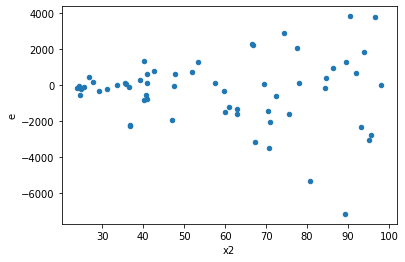

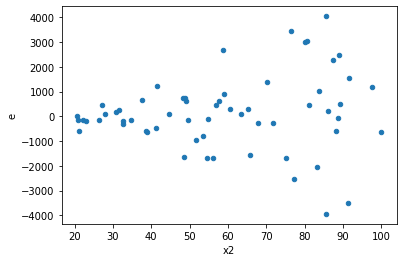

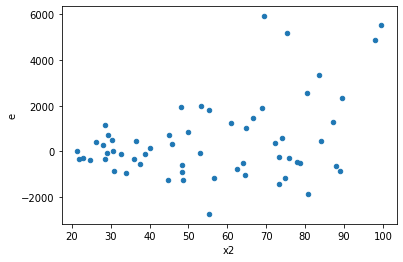

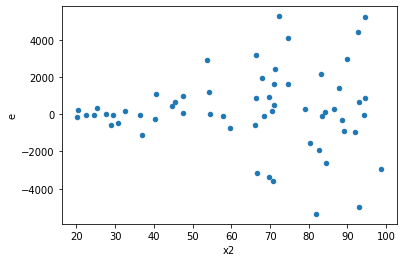

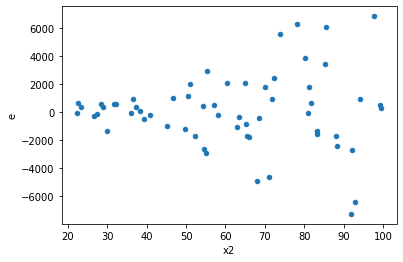

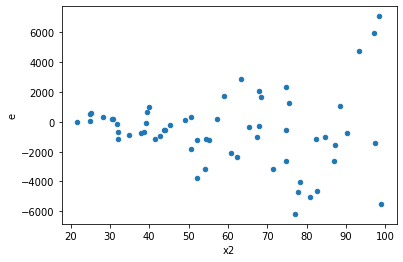

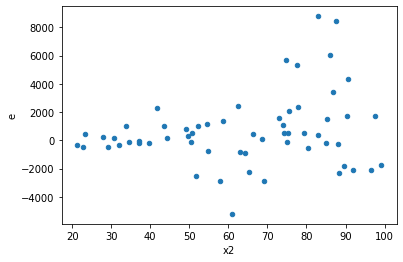

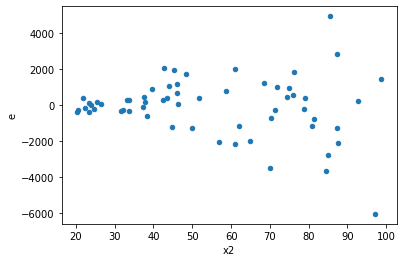

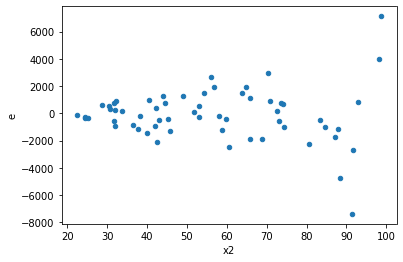

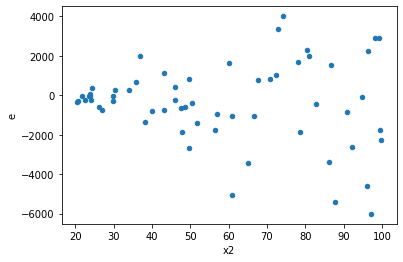

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,20.0,20.0,26339911.273974616,57317289.94873246,1316995.563698731,2865864.497436623,2.176062377452475,0.08982135026627525,0.9550893248668624,0.04491067513313762,Reject001=1 : Homoscedasticity
2.0,20.0,20.0,15500839.19923099,37664286.20338028,775041.9599615495,1883214.310169014,2.4298223934384686,0.053591629825350484,0.9732041850873248,0.026795814912675242,Reject001=1 : Homoscedasticity
5.0,20.0,20.0,104111195.84352401,147257858.60186055,5205559.7921762,7362892.930093028,1.414428653986308,0.444989573499043,0.7775052132504785,0.2224947867495215,Reject001=1 : Homoscedasticity
6.0,20.0,20.0,58871588.73404228,198114197.86358833,2943579.436702114,9905709.893179417,3.365191973306294,0.009195957067415383,0.9954020214662923,0.004597978533707692,Reject001=0 : Heteroscedasticity
8.0,20.0,20.0,31373561.59629591,126242810.31223752,1568678.0798147956,6312140.515611876,4.023859705081818,0.003039561023944204,0.9984802194880279,0.001519780511972102,Reject001=0 : Heteroscedasticity
13.0,20.0,20.0,5999056.006619252,65405132.44119611,299952.80033096264,3270256.6220598053,10.902570732633473,1.586921303475819e-06,0.9999992065393483,7.934606517379095e-07,Reject001=0 : Heteroscedasticity
14.0,20.0,20.0,14947224.714573044,150415591.70313168,747361.2357286522,7520779.585156584,10.063111686310672,3.1170733010288387e-06,0.9999984414633495,1.5585366505144194e-06,Reject001=0 : Heteroscedasticity
17.0,20.0,20.0,24122585.46856735,75095064.19312295,1206129.2734283675,3754753.2096561478,3.1130603430123482,0.014458115062097487,0.9927709424689513,0.007229057531048744,Reject001=1 : Homoscedasticity
18.0,20.0,20.0,71101745.9482591,85138332.45293391,3555087.297412955,4256916.622646695,1.1974154968696444,0.6909289145547226,0.6545355427226387,0.3454644572773613,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,94163712.75707059,53253753.55968257,4708185.637853529,2662687.6779841287,0.5655443270070492,0.21115373258289952,Reject001=1 : Homoscedasticity
1.0,20.0,20.0,26339911.273974616,57317289.94873246,1316995.563698731,2865864.497436623,2.176062377452475,0.08982135026627525,Reject001=1 : Homoscedasticity
2.0,20.0,20.0,15500839.19923099,37664286.20338028,775041.9599615495,1883214.310169014,2.4298223934384686,0.053591629825350484,Reject001=1 : Homoscedasticity
3.0,20.0,20.0,116048504.07527323,82125511.1430201,5802425.203763662,4106275.5571510047,0.7076826349243635,0.44625290355787395,Reject001=1 : Homoscedasticity
4.0,20.0,20.0,154573415.0744276,77695119.69395639,7728670.753721381,3884755.9846978197,0.5026421888689329,0.13241726570719708,Reject001=1 : Homoscedasticity
5.0,20.0,20.0,104111195.84352401,147257858.60186055,5205559.7921762,7362892.930093028,1.414428653986308,0.444989573499043,Reject001=1 : Homoscedasticity
6.0,20.0,20.0,58871588.73404228,198114197.86358833,2943579.436702114,9905709.893179417,3.365191973306294,0.009195957067415383,Reject001=0 : Heteroscedasticity
7.0,20.0,20.0,50255627.5992173,17331444.406352114,2512781.3799608652,866572.2203176057,0.34486574408279874,0.02148250189505278,Reject001=1 : Homoscedasticity
8.0,20.0,20.0,31373561.59629591,126242810.31223752,1568678.0798147956,6312140.515611876,4.023859705081818,0.003039561023944204,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      590
Reject001=0 : Heteroscedasticity    410
Name: Result_test, dtype: int64